<a href="https://colab.research.google.com/github/sweetyjunnarkar/Tweet_Impact_Analysis/blob/main/Circus_Social_Sweety_Junnarkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jahanna Chronicle, a technology company based in Lunakick, has reached out to you with a task that involves predicting the impact of a tweet and prepare a report on your analysis. You could think about ‘impact’ as a value that could help Jahanna Chronicle decide if the tweet could go viral. 
Chronicle’s data team has worked hard and prepared a dataset for you. They compiled the data and decided to share it via HTTP. So here is the link, directly from the Chronicle’s data team! 

Dataset: Attached as part of email

There are 15 features and 1 dependent variable (also called as the output variable; Here it is named as ‘impact’). 

Post Content - The text in the tweet

Sentiment score - Ranges from -20 to +20 (0 - neutral)

Post Length - The length of the tweet

Hashtag Count - The number of hashtags used in the tweet

Content URL Count - The number of URLs mentioned in the tweet

Tweet Count - The total number of tweets posted by the author of the tweet

Followers Count - The number of followers of the author of the post

Listed Count - the number of lists the post author is a part of

Media Type - The media type of the post (Text, image, video)

Published Datetime - The published time of the tweet

Mentions Count - The number of user mentions in the tweet

Post Author Verified - 1 if author is a verified user

Likes - Likes received for the tweet

Shares - Retweets received for the tweet

Comments - Number of comments for the tweet

For some weird reason, Chronicle’s engineering team is adamant that you explore modeling using a decision tree (with some form of boosting and pruning), neural network and linear regression but give the model that fits best. 

To summarize here are the tasks required by Jahanna Chronicle: 

● Give the model and code (by uploading it to a public repo) that can best predict the impact score 

● Prepare a report of not more than 6 pages of your findings of data. It should include analysis like the training and testing error rates you obtained running the various learning algorithms on your problems, graphs that show performance on both training and test data as a function of training size, Why did you get the results you did? How fast were they in terms of wall clock time? How much performance was due to the problems you were given? How about the values you chose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?)? Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can. 

● All the code that was used to prepare a report (also by uploading it to a public repo)
Note from Jahanna Chronicle: The engineers at Chronicle must be able to recreate all experiments/graphs/results. (So you may want to include a readme on how to run the code)


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
tweet_df = pd.read_csv('/content/drive/MyDrive/Circus Social/Twitter.csv')

In [272]:
tweet_df.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50000 non-null  int64  
 1   Id                    50000 non-null  object 
 2   Post Contet           50000 non-null  object 
 3   Sentiment score       50000 non-null  float64
 4   Post Length           50000 non-null  float64
 5   Hashtag count         50000 non-null  float64
 6   Content URL count     50000 non-null  float64
 7   Tweet count           50000 non-null  float64
 8   Followers count       50000 non-null  float64
 9   Listed Count          50000 non-null  int64  
 10  Media Type            50000 non-null  object 
 11  Published DateTime    50000 non-null  object 
 12  Mentions Count        50000 non-null  float64
 13  Post author verified  50000 non-null  float64
 14  Likes                 50000 non-null  float64
 15  Shares             

In [274]:
tweet_df.shape

(50000, 18)

In [275]:
tweet_df.describe(include='all')

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
count,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000,50000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000
unique,NaN,47512,47429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,47412,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5e2514cfe00b65813cc6148712e5854ee8e7ff7d,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEXT,2020-04-22 23:00:48+00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30176,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,14193.578860,NaN,NaN,1.068916,154.692360,0.687520,0.480260,2.414257e+05,4.648759e+06,10069.683200,NaN,NaN,0.113720,0.626480,3020.7063,966.773260,16.407920,40038.735600
std,10363.500433,NaN,NaN,10.436746,79.099411,1.346979,0.526019,1.607467e+06,1.254513e+07,28384.958681,NaN,NaN,0.512984,0.483743,8261.9454,3117.212706,543.669304,103075.779094
min,0.000000,NaN,NaN,-20.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,6017.000000,NaN,NaN,0.000000,94.000000,0.000000,0.000000,1.123775e+04,1.053900e+04,2.000000,NaN,NaN,0.000000,0.000000,1.0000,0.000000,0.000000,10.000000
50%,12076.500000,NaN,NaN,0.000000,142.000000,0.000000,0.000000,5.273800e+04,3.551225e+05,555.500000,NaN,NaN,0.000000,1.000000,153.0000,42.000000,0.000000,2100.000000
75%,20650.250000,NaN,NaN,0.000000,215.000000,1.000000,1.000000,2.595015e+05,2.809978e+06,6171.000000,NaN,NaN,0.000000,1.000000,1909.0000,559.000000,0.000000,27500.000000


In [276]:
tweet_df.isnull().sum()

Unnamed: 0              0
Id                      0
Post Contet             0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

In [277]:
tweet_df['Unnamed: 0'].nunique()

27991

In [278]:
tweet_df.drop('Unnamed: 0',axis=1,inplace=True)

In [279]:
tweet_df=tweet_df.drop_duplicates()

In [280]:
tweet_df.head()

,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
tweet_df['Id'].nunique()

47512

In [282]:
tweet_df.drop(['Id','Post Contet'],axis=1,inplace=True)

In [283]:
tweet_df.columns

Index(['Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count',
       'Tweet count', 'Followers count', 'Listed Count', 'Media Type',
       'Published DateTime', 'Mentions Count', 'Post author verified', 'Likes',
       'Shares', 'Comments', 'Impact'],
      dtype='object')

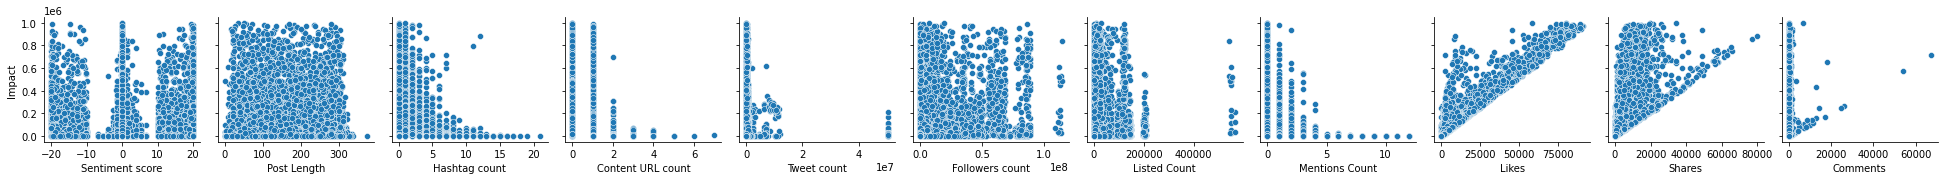

In [286]:
pp = sns.pairplot(data=tweet_df,
                  y_vars=['Impact'],
                  x_vars=numeric_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


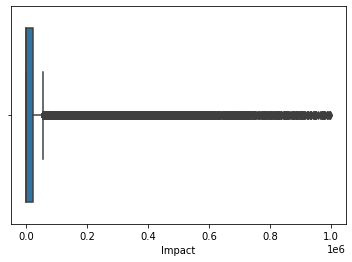

In [287]:
sns.boxplot(tweet_df['Impact'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


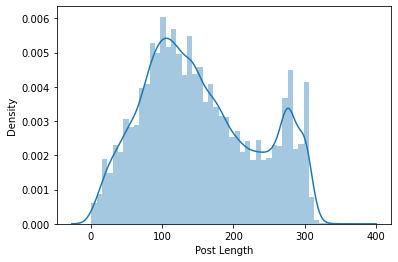

In [288]:
sns.distplot(tweet_df['Post Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


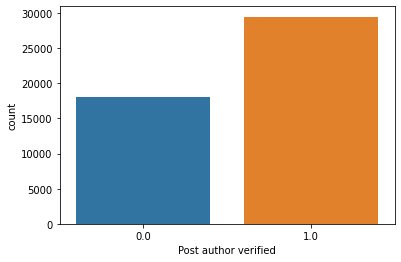

In [289]:
sns.countplot(tweet_df['Post author verified'])

In [290]:
tweet_df['Sentiment score'].nunique()

2100

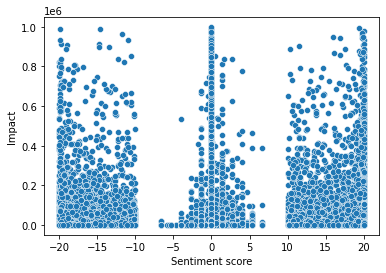

In [291]:
sns.scatterplot(x= tweet_df['Sentiment score'],y=tweet_df['Impact'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


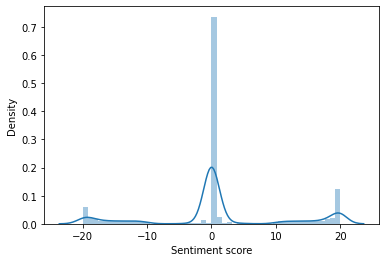

In [292]:
sns.distplot(tweet_df['Sentiment score'])

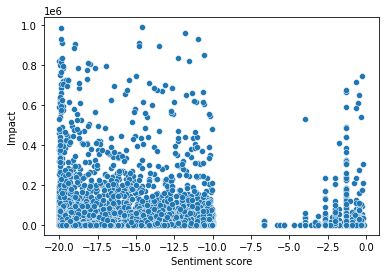

In [293]:
sns.scatterplot(x=tweet_df[tweet_df['Sentiment score']<0]['Sentiment score'],y=tweet_df[tweet_df['Sentiment score']<0]['Impact'])

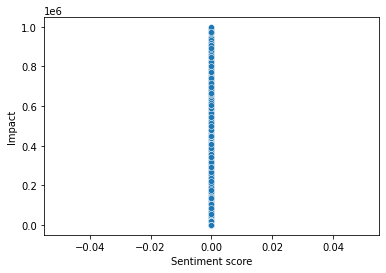

In [294]:
sns.scatterplot(x=tweet_df[tweet_df['Sentiment score']==0]['Sentiment score'],y=tweet_df[tweet_df['Sentiment score']==0]['Impact'])

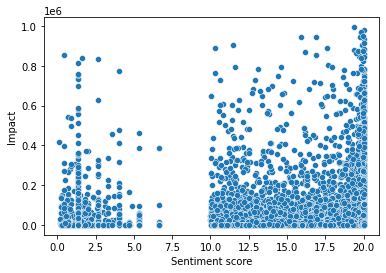

In [295]:
sns.scatterplot(x=tweet_df[tweet_df['Sentiment score']>0]['Sentiment score'],y=tweet_df[tweet_df['Sentiment score']>0]['Impact'])

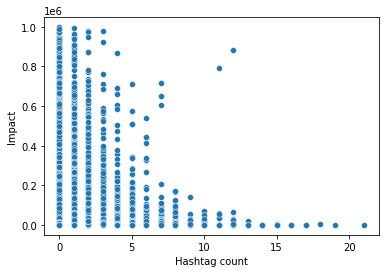

In [297]:
sns.scatterplot(x=tweet_df['Hashtag count'],y=tweet_df['Impact'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


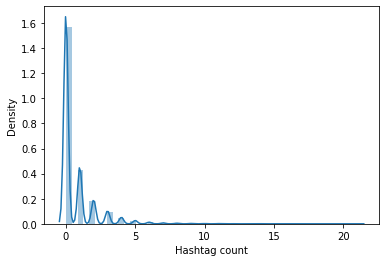

In [298]:
sns.distplot(tweet_df['Hashtag count'])

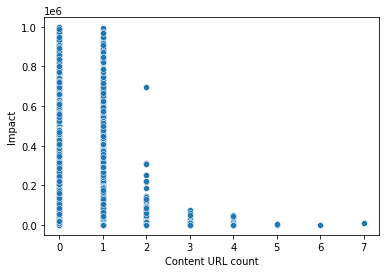

In [299]:
sns.scatterplot(x=tweet_df['Content URL count'],y=tweet_df['Impact'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


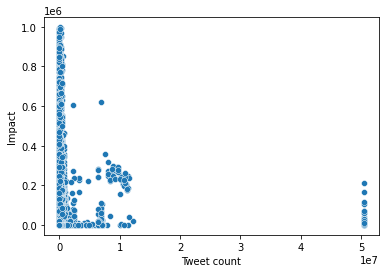

In [301]:
sns.scatterplot(tweet_df['Tweet count'],tweet_df['Impact'])

In [20]:
tweet_df.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from datetime import datetime

In [22]:
tweet_df['Published DateTime'] = pd.to_datetime(tweet_df['Published DateTime'])

In [38]:
# day
tweet_df['Day'] = tweet_df['Published DateTime'].dt.day
# month
tweet_df['Month'] = tweet_df['Published DateTime'].dt.month
# year
tweet_df['Year'] = tweet_df['Published DateTime'].dt.year
# hour
tweet_df['Start_hour'] = tweet_df['Published DateTime'].dt.hour
# minute
tweet_df['Start_minute'] = tweet_df['Published DateTime'].dt.minute
# second
tweet_df['Start_second'] = tweet_df['Published DateTime'].dt.second
# Monday is 0 and Sunday is 6
tweet_df['Start_weekday'] = tweet_df['Published DateTime'].dt.weekday

In [39]:
tweet_df['Start_weekday'].unique()

array([3, 2, 1, 6, 5, 4, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


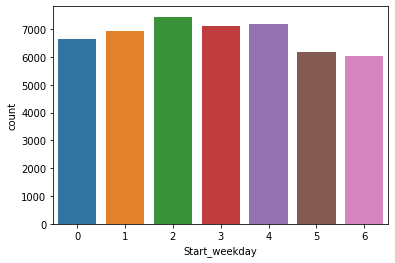

In [40]:
sns.countplot(tweet_df['Start_weekday'])

In [43]:
#conditions and values are given first
conditions = [
    (tweet_df['Start_hour']>=0) & (tweet_df['Start_hour']<6),      
    (tweet_df['Start_hour']<12) & (tweet_df['Start_hour']>=6),
    (tweet_df['Start_hour']>=12) & (tweet_df['Start_hour']<=18),
    (tweet_df['Start_hour']>18)  & (tweet_df['Start_hour']<=24),
    ]
values = [0,1, 2, 3]
tweet_df['Period'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


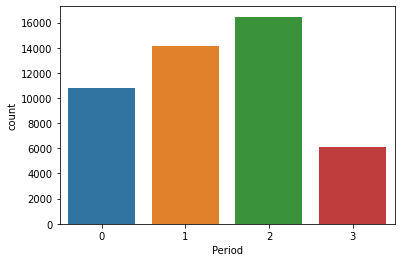

In [44]:
sns.countplot(tweet_df['Period'])

In [45]:
tweet_df.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Period
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0,28,1,2021,12,17,24,3,2
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0,24,2,2021,6,51,2,2,1
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0,15,9,2020,1,16,32,1,0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0,14,2,2021,3,53,53,6,0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,7,2020,13,6,16,5,2


In [46]:
tweet_df['Media Type'].nunique()

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


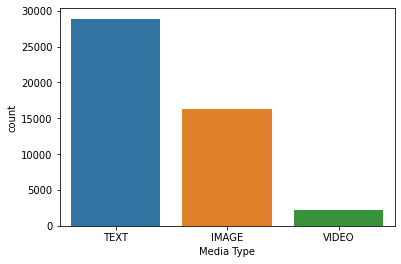

In [302]:
sns.countplot(tweet_df['Media Type'])

In [47]:
one_hot = pd.get_dummies(tweet_df['Media Type'])
# Drop column 'Media Type' as it is now encoded
tweet_df = tweet_df.drop('Media Type',axis = 1)
# Join the encoded tweet_df
tweet_df = tweet_df.join(one_hot)
tweet_df.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Period,IMAGE,TEXT,VIDEO
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0,28,1,2021,12,17,24,3,2,0,1,0
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0,24,2,2021,6,51,2,2,1,0,1,0
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0,15,9,2020,1,16,32,1,0,0,1,0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0,14,2,2021,3,53,53,6,0,0,1,0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,7,2020,13,6,16,5,2,1,0,0


In [48]:
tweet_df.drop(['Year','Start_hour','Start_minute','Start_second','Published DateTime'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


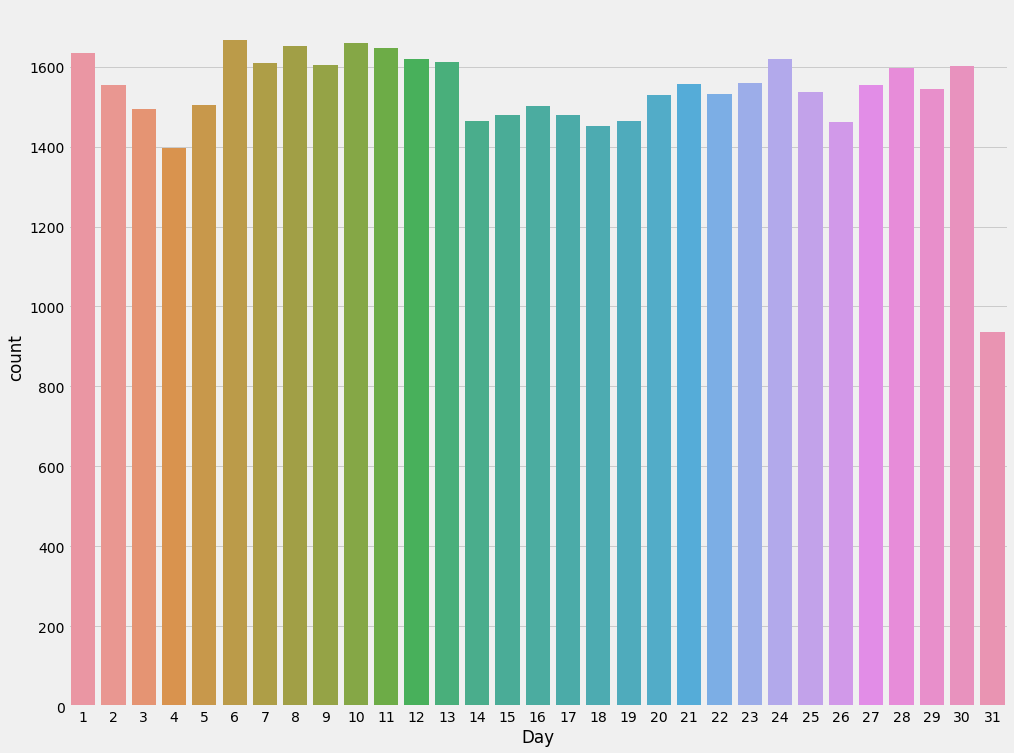

In [294]:
plt.figure(figsize=(15,12))
sns.countplot(tweet_df['Day'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


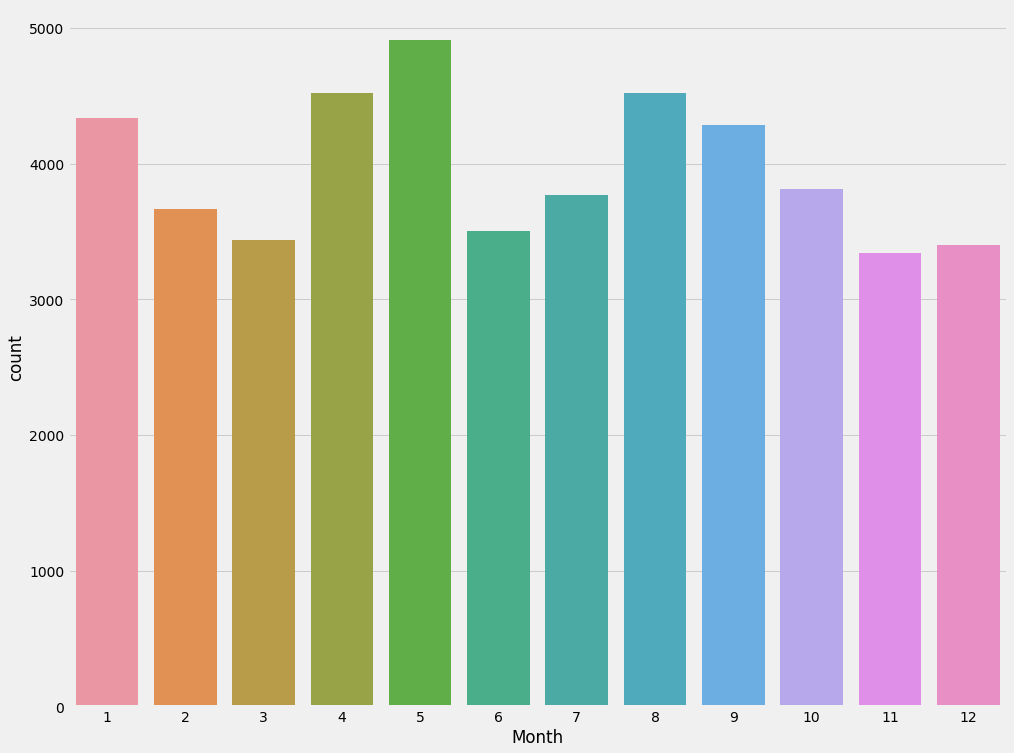

In [295]:
plt.figure(figsize=(15,12))
sns.countplot(tweet_df['Month'])

In [296]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [297]:
calc_vif(tweet_df[[i for i in tweet_df.describe().columns if i in tweet_df.columns]])

,variables,VIF
0,Sentiment score,1.030581e+00
1,Post Length,1.093276e+00
2,Hashtag count,1.074329e+00
3,Content URL count,1.243600e+00
4,Tweet count,1.021541e+00
5,Followers count,2.035732e+00
6,Listed Count,1.937903e+00
7,Mentions Count,1.037684e+00
8,Post author verified,1.304255e+00
9,Likes,1.192105e+08


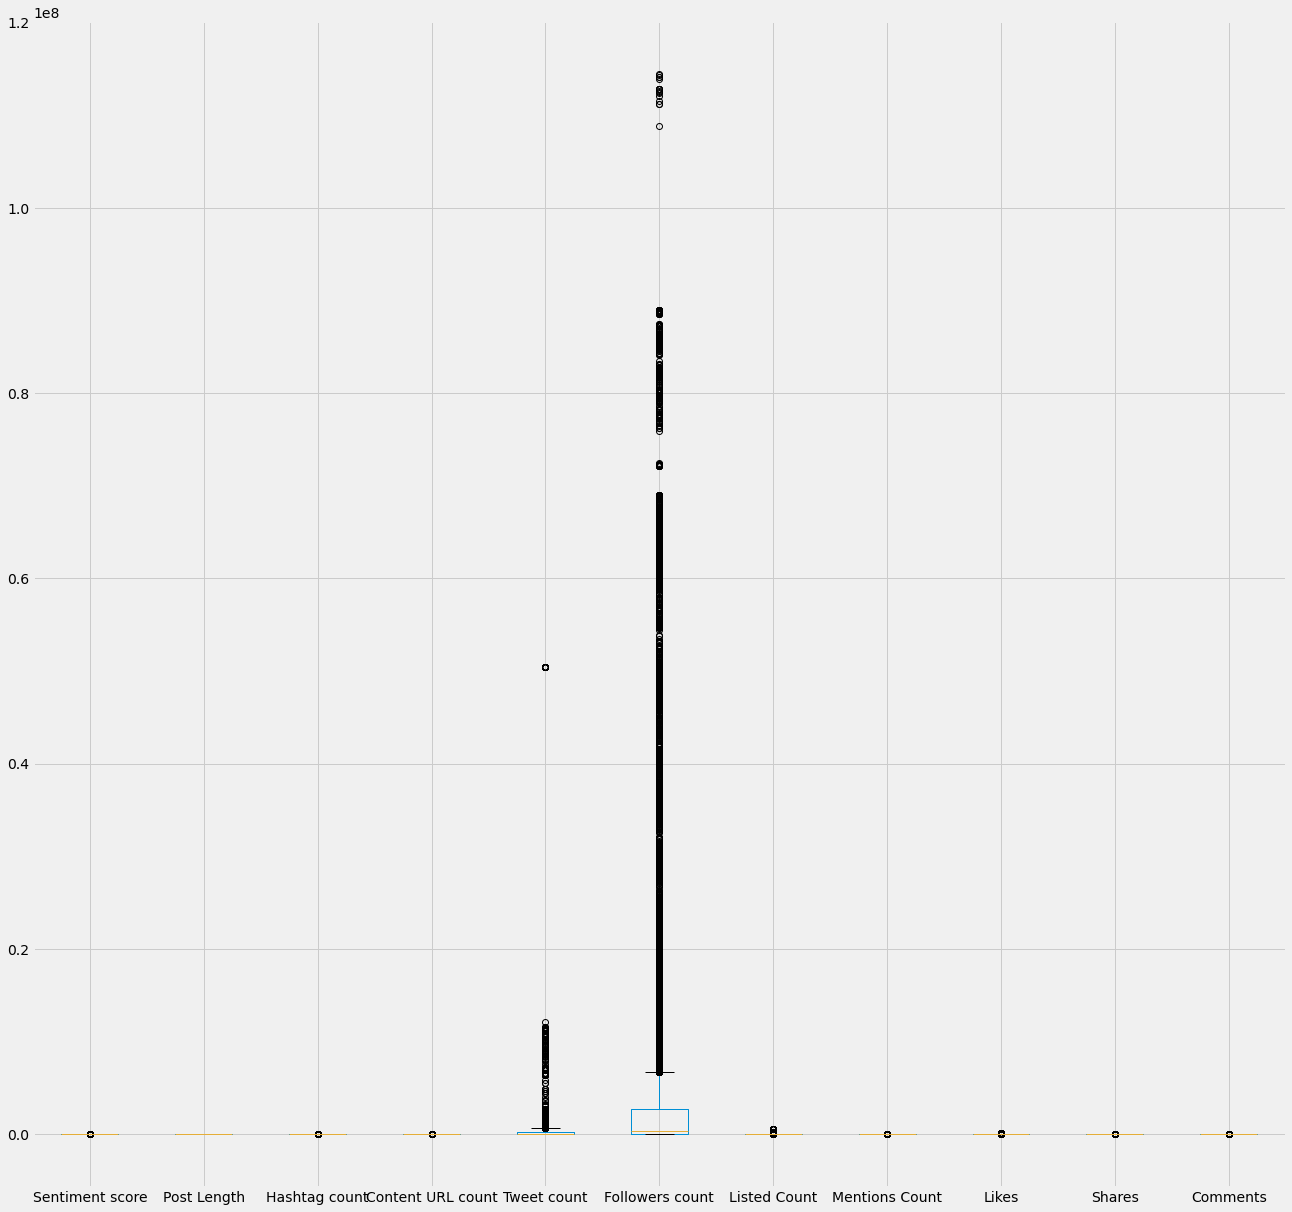

In [298]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(20,20))
tweet_df.boxplot(numeric_cols)

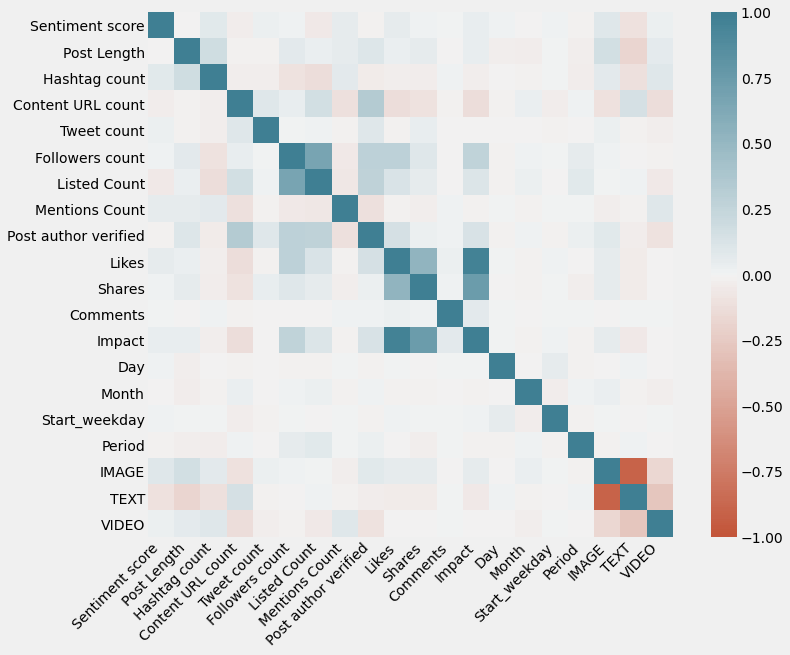

In [299]:
corr =tweet_df.corr()
plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))

In [52]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Sentiment score : 3.1422039999999987
Post Length : 3.631518
Hashtag count : 0.46563299999999863
Content URL count : 0.32498699999999836
Tweet count : 9.335082
Followers count : 9.072526
Listed Count : 7.88575
Mentions Count : 0.16820599999999786
Post author verified : 0.30525999999999875
Likes : 8.056389
Shares : 6.733421
Comments : 0.9853570000000023
Day : 1.7045260000000004
Month : 1.1114650000000008
Start_weekday : 0.783294999999999
Period : 0.4769110000000012
IMAGE : 0.245336
TEXT : 0.2562319999999989
VIDEO : 0.09695199999999993


Text(0.5, 1.0, 'Feature Importance')

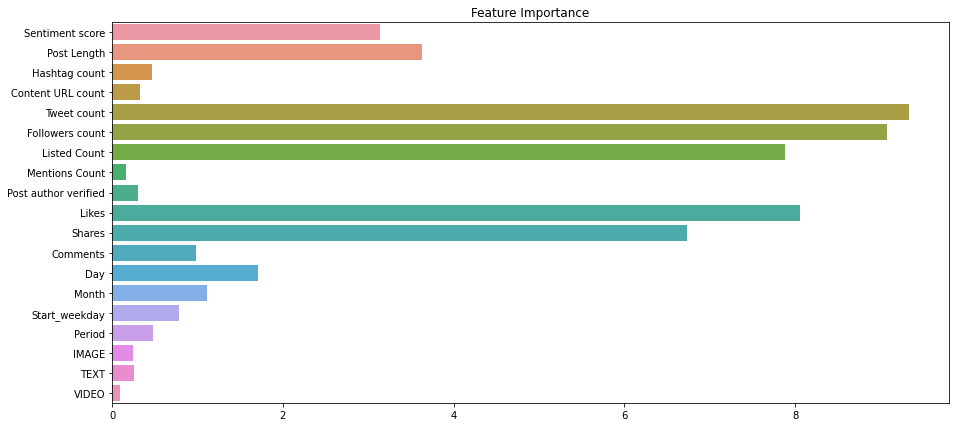

In [53]:
info_gain={}
for feature in tweet_df.drop(columns='Impact').columns:
    feature_info_gain = comp_feature_information_gain(tweet_df, 'Impact', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

We can drop the features which have less than 0.3 score

In [56]:
tweet_df.drop(['Mentions Count','Post author verified','IMAGE','TEXT','VIDEO'],axis=1,inplace=True)

In [63]:
tweet_df

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Likes,Shares,Comments,Impact,Day,Month,Start_weekday,Period
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,0.0,0.0,0.0,0.0,28,1,3,2
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,10.0,1.0,0.0,110.0,24,2,2,1
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,0.0,0.0,0.0,0.0,15,9,1,0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,460.0,219.0,4.0,6830.0,14,2,6,0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,0.0,0.0,0.0,0.0,4,7,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.0,171.0,2.0,0.0,9694.0,92163.0,1103,1505.0,484.0,0.0,19890.0,7,11,5,1
49995,0.0,107.0,0.0,1.0,58592.0,61369.0,0,0.0,0.0,0.0,0.0,18,8,1,1
49996,0.0,123.0,0.0,1.0,69967.0,37227.0,0,0.0,0.0,0.0,0.0,3,6,2,0
49997,0.0,226.0,0.0,1.0,1587.0,40.0,0,0.0,0.0,0.0,0.0,20,6,5,2


In [64]:
from sklearn.preprocessing import StandardScaler

In [221]:
trans = StandardScaler()
data= trans.fit_transform(tweet_df)
tweets=pd.DataFrame(data)

In [222]:
tweets

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.096857,-1.735129,-0.509715,-0.925051,-0.152841,-0.367026,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,1.382008,-1.589040,0.039500,0.640734
1,1.762599,-0.887027,-0.509715,0.972989,0.050926,-0.249380,-0.158216,-0.345730,-0.292115,-0.028663,-0.367179,0.930434,-1.292931,-0.472989,-0.386412
2,-0.096857,-0.962976,-0.509715,-0.925051,-0.128232,-0.366909,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,-0.085606,0.779837,-0.985479,-1.413558
3,-0.096857,1.644621,0.971255,-0.925051,-0.148740,-0.364797,-0.354424,-0.288394,-0.219196,-0.020353,-0.298649,-0.198500,-1.292931,1.576969,-1.413558
4,-2.023755,-0.937660,-0.509715,0.972989,-0.018393,-0.366841,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,-1.327433,0.187618,1.064480,0.640734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47507,-0.096857,0.214240,0.971255,-0.925051,-0.147681,-0.359445,-0.315493,-0.155246,-0.130556,-0.028663,-0.165465,-0.988753,1.372056,1.064480,-0.386412
47508,-0.096857,-0.595887,-0.509715,0.972989,-0.116276,-0.361982,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,0.253074,0.483727,-0.985479,-0.386412
47509,-0.096857,-0.393355,-0.509715,0.972989,-0.108970,-0.363971,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,-1.440327,-0.108492,-0.472989,-1.413558
47510,-0.096857,0.910443,-0.509715,0.972989,-0.152888,-0.367034,-0.355363,-0.347004,-0.292449,-0.028663,-0.368301,0.478861,-0.108492,1.064480,0.640734


In [223]:
X = tweets.drop(10,axis=1)

In [224]:
y = tweets[10]

In [225]:
X

,0,1,2,3,4,5,6,7,8,9,11,12,13,14
0,-0.096857,-1.735129,-0.509715,-0.925051,-0.152841,-0.367026,-0.355363,-0.347004,-0.292449,-0.028663,1.382008,-1.589040,0.039500,0.640734
1,1.762599,-0.887027,-0.509715,0.972989,0.050926,-0.249380,-0.158216,-0.345730,-0.292115,-0.028663,0.930434,-1.292931,-0.472989,-0.386412
2,-0.096857,-0.962976,-0.509715,-0.925051,-0.128232,-0.366909,-0.355363,-0.347004,-0.292449,-0.028663,-0.085606,0.779837,-0.985479,-1.413558
3,-0.096857,1.644621,0.971255,-0.925051,-0.148740,-0.364797,-0.354424,-0.288394,-0.219196,-0.020353,-0.198500,-1.292931,1.576969,-1.413558
4,-2.023755,-0.937660,-0.509715,0.972989,-0.018393,-0.366841,-0.355363,-0.347004,-0.292449,-0.028663,-1.327433,0.187618,1.064480,0.640734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47507,-0.096857,0.214240,0.971255,-0.925051,-0.147681,-0.359445,-0.315493,-0.155246,-0.130556,-0.028663,-0.988753,1.372056,1.064480,-0.386412
47508,-0.096857,-0.595887,-0.509715,0.972989,-0.116276,-0.361982,-0.355363,-0.347004,-0.292449,-0.028663,0.253074,0.483727,-0.985479,-0.386412
47509,-0.096857,-0.393355,-0.509715,0.972989,-0.108970,-0.363971,-0.355363,-0.347004,-0.292449,-0.028663,-1.440327,-0.108492,-0.472989,-1.413558
47510,-0.096857,0.910443,-0.509715,0.972989,-0.152888,-0.367034,-0.355363,-0.347004,-0.292449,-0.028663,0.478861,-0.108492,1.064480,0.640734


In [226]:
y

0       -0.368301
1       -0.367179
2       -0.368301
3       -0.298649
4       -0.368301
           ...   
47507   -0.165465
47508   -0.368301
47509   -0.368301
47510   -0.368301
47511   -0.368301
Name: 10, Length: 47512, dtype: float64

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 3)

In [229]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [234]:
y_pred_test = dt_regressor.predict(X_test)
y_pred_train = dt_regressor.predict(X_train)

In [231]:
from sklearn import metrics 

In [237]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R Squared test Score is:', r2_score(y_test, y_pred_test))
print('R Squared train Score is:', r2_score(y_train, y_pred_train))

Mean Absolute Error test: 0.00976186223651804
Mean Absolute Error train: 0.00013069022672064674
Mean Squared Error test: 0.008705400713937989
Mean Squared Error train: 4.3815938526946105e-08
Root Mean Squared Error test: 0.09330273690486249
Root Mean Squared Error train: 0.0002093225705148542
R Squared test Score is: 0.9898447163022378
R Squared train Score is: 0.999999957690282


In [239]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [241]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [242]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R Squared test Score is:', r2_score(y_test, y_pred_test))
print('R Squared train Score is:', r2_score(y_train, y_pred_train))

Mean Absolute Error test: 0.005389360071896582
Mean Absolute Error train: 0.0017567557468834128
Mean Squared Error test: 0.008030745459825185
Mean Squared Error train: 0.0001635352556620187
Root Mean Squared Error test: 0.08961442662777677
Root Mean Squared Error train: 0.012788090383713226
R Squared test Score is: 0.9906317352722814
R Squared train Score is: 0.999842086446556


In [191]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# from sklearn.preprocessing import Imputer

In [86]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.2],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'n_estimators' : [300,500,600,700],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 67.3min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror'}

In [244]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

CPU times: user 7.74 s, sys: 18.8 ms, total: 7.75 s
Wall time: 7.73 s


In [245]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R Squared test Score is:', r2_score(y_test, y_pred_test))
print('R Squared train Score is:', r2_score(y_train, y_pred_train))

Mean Absolute Error test: 0.013078410048125969
Mean Absolute Error train: 0.009220106875640774
Mean Squared Error test: 0.005544976423725062
Mean Squared Error train: 0.00031839911395535717
Root Mean Squared Error test: 0.07446459845943616
Root Mean Squared Error train: 0.017843741590691038
R Squared test Score is: 0.9935315087115779
R Squared train Score is: 0.9996925462017682


In [246]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.linear_model import LassoCV
from numpy import arange

In [248]:
## define model evaluation method
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## define model

lasso_model = LassoCV(alphas=arange(0, 1, 0.02), cv=cross_validation , n_jobs=-1)

## fit model
lasso_model .fit(X, y)
## summarize chosen configuration
print('alpha: %f' % lasso_model .alpha_)

pred_train_lasso= lasso_model .predict(X_train)
pred_test_lasso= lasso_model .predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to

alpha: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1218: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [249]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train, pred_train_lasso))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, pred_train_lasso))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lasso)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_lasso)))
print('R Squared test Score is:', r2_score(y_test, pred_test_lasso))
print('R Squared train Score is:', r2_score(y_train, pred_train_lasso))

Mean Absolute Error test: 2.297458534860365e-05
Mean Absolute Error train: 2.1643792501682977e-05
Mean Squared Error test: 2.076613823611422e-08
Mean Squared Error train: 2.8629352312553153e-09
Root Mean Squared Error test: 0.00014410460865674706
Root Mean Squared Error train: 5.3506403647183345e-05
R Squared test Score is: 0.999999975775265
R Squared train Score is: 0.9999999972354813


In [250]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
pred_train_lr= lr.predict(X_train)
pred_test_lr= lr.predict(X_test)

In [253]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, pred_test_lr))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train,pred_train_lr))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, pred_test_lr))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, pred_train_lr))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_lr)))
print('R Squared test Score is:', r2_score(y_test, pred_test_lr))
print('R Squared train Score is:', r2_score(y_train, pred_train_lr))

Mean Absolute Error test: 4.5924741097256934e-06
Mean Absolute Error train: 2.9977651024766116e-06
Mean Squared Error test: 1.9701195214881017e-08
Mean Squared Error train: 1.7934962145688324e-09
Root Mean Squared Error test: 0.00014036094618832197
Root Mean Squared Error train: 4.23496896631939e-05
R Squared test Score is: 0.9999999770175741
R Squared train Score is: 0.9999999982681572


In [256]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
pred_test_rr= rr.predict(X_test)

In [257]:
print('Mean Absolute Error test:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('Mean Absolute Error train:', metrics.mean_absolute_error(y_train,pred_train_rr))
print('Mean Squared Error test:', metrics.mean_squared_error(y_test, pred_test_rr))
print('Mean Squared Error train:', metrics.mean_squared_error(y_train, pred_train_rr))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr)))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_rr)))
print('R Squared test Score is:', r2_score(y_test, pred_test_rr))
print('R Squared train Score is:', r2_score(y_train, pred_train_rr))

Mean Absolute Error test: 4.575682526274442e-06
Mean Absolute Error train: 2.9786777938883565e-06
Mean Squared Error test: 1.970149224155151e-08
Mean Squared Error train: 1.7935460238129882e-09
Root Mean Squared Error test: 0.0001403620042659391
Root Mean Squared Error train: 4.235027773005731e-05
R Squared test Score is: 0.9999999770172276
R Squared train Score is: 0.999999998268109
